## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 7
---------------------------------------

GOALS:

1. Answer all the questions from the lecture - we will use the scientists data and the grocery data.
2. Analyze data about College majors - your first EDA! (Think of this as a practice exam.)

----------------------------------------------------------

This homework has **9 Questions** and **A Practice Exam**

NOTE:
The practice exam is intended to give you an idea of what an exam in this class might feel like. Remember you will be expected to work on the exam **independently** and submit your work before we get together to work on the exam in class. **15\% of your Exam grade will come from what you can do independently** so start practicing now and get help if you need it!.

In [152]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

## Lecture Questions

First we will import the data about female scientists.

In [155]:
file1 = 'https://joannabieri.com/introdatascience/data/dates.csv'
DF_dates = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/professions.csv'
DF_professions = pd.read_csv(file2)
file3 = 'https://joannabieri.com/introdatascience/data/works.csv'
DF_works = pd.read_csv(file3)
show(DF_dates)
show(DF_professions)
show(DF_works)

**Q1** Are each of these data sets Tidy?
* I believe that each of these data sets are tidy because each column defines a variable and the data is easy to read and understand. In addition, all of the variable names are very direct which makes the data even more clear.
 
**Q2** Do they all contain the same number of observations?
  
* No they do not. They range from 8-10 observations. AKA, in this context, the observations are names.

**Q3** What are the five variables?

* The 5 variables are name, birthyear, death year, profession, and known for.
  
**Q4** What variable do they have in common - what can we join **on**
  
* The variable that each table has in common is that all of them have names of people. In fact, some of these names are present in all three tables displayed.

In [149]:
DF_raw.shape

print(len(DF_raw))

print(len(DF_raw.columns))

173
21


## Combining Three Data Sets

You need to think about the order and whether or not you want to keep the maximum number of names or only keep names that are in all the data frames.

In this case we will try to keep the maximal amount of data - the maximum number of names.

1. Combine the professions and works data
2. Then add the dates data

In [13]:
# 1. Combine the professions and works data
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists
# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q5** What, if anything, would change if you switched to how='right'?

In [15]:
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year_x,death_year_x,birth_year_y,death_year_y
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0,1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0,1918,2020.0
3,Rosalind Franklin,Chemist,NaN,1920.0,1958.0,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN,1964,NaN


* If you switch left to right, the columns coompletely change and contain different data compared to the previous.

## Combining Two Data Sets - You Try

**Q6** Write code that would combine the professions data and the dates data, but drop any names that don't appear in both.

In [186]:
# profession and works data together
DF_new_scientists = pd.merge(DF_professions,DF_dates,on='name',how='inner')
DF_new_scientists


,name,profession,birth_year,death_year
0,Janaki Ammal,Botanist,1897,1984.0
1,Chien-Shiung Wu,Physicist,1912,1997.0
2,Katherine Johnson,Mathematician,1918,2020.0
3,Rosalind Franklin,Chemist,1920,1958.0
4,Vera Rubin,Astronomer,1928,2016.0
5,Gladys West,Mathematician,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,1947,NaN
7,Jennifer Doudna,Biochemist,1964,NaN


## Combining Three Data Sets - You Try

**Q7** Try to combine the three data sets together (professions, works, and dates) but instead of doing what we did above, see if you can keep only the names that appeared in all three data sets.

In [173]:
# profession and works data together
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='left')
DF_scientists

# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='left')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Ada Lovelace,Mathematician,first computer algorithm,NaN,NaN
1,Marie Curie,Physicist and Chemist,"theory of radioactivity, discovery of element...",NaN,NaN
2,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897.0,1984.0
3,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912.0,1997.0
4,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918.0,2020.0
5,Rosalind Franklin,Chemist,NaN,1920.0,1958.0
6,Vera Rubin,Astronomer,existence of dark matter,1928.0,2016.0
7,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930.0,NaN
8,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947.0,NaN
9,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964.0,NaN


**Q** What, if anything, would change if you switched to how=‘right’?

In [176]:
# profession and works data together
DF_scientists = pd.merge(DF_professions,DF_works,on='name',how='right')
DF_scientists

# 2. Then add the dates data
DF_scientists = pd.merge(DF_scientists,DF_dates,on='name',how='right')
DF_scientists

,name,profession,known_for,birth_year,death_year
0,Janaki Ammal,Botanist,"hybrid species, biodiversity protection",1897,1984.0
1,Chien-Shiung Wu,Physicist,confim and refine theory of radioactive beta d...,1912,1997.0
2,Katherine Johnson,Mathematician,calculations of orbital mechanics critical to ...,1918,2020.0
3,Rosalind Franklin,NaN,NaN,1920,1958.0
4,Vera Rubin,Astronomer,existence of dark matter,1928,2016.0
5,Gladys West,Mathematician,mathematical modeling of the shape of the Eart...,1930,NaN
6,Flossie Wong-Staal,Virologist and Molecular Biologist,first scientist to clone HIV and create a map ...,1947,NaN
7,Jennifer Doudna,Biochemist,"one of the primary developers of CRISPR, a gro...",1964,NaN


* If we were to change "right" to "left" we would be left with different scientist names in different order since left and right distinguish which part of the given data frame with be merged/joined together.

## Case study - Grocery Sales

Below you will load some data about grocery sales and see how joining or merging data can help us answer questions.

In [188]:
file1 = 'https://joannabieri.com/introdatascience/data/purchases.csv'
DF_purchases = pd.read_csv(file1)
file2 = 'https://joannabieri.com/introdatascience/data/prices.csv'
DF_prices = pd.read_csv(file2)
show(DF_purchases)
show(DF_prices)

## Calculate the total revenue

**Q8** Given the data above find the total revenue.

We will have to join the data frames so that we can see the price of what was sold. So first we look for a common column. In this case both data frames have **item** as a column.

Now, think about how to calculate revenue... we need to add up the total money we made, so we need to know the price of each thing sold.

**PAUSE - see if you can write some of the code for this before looking at the cells below**

In [190]:
# Merging the two data frames on the column item, using DF_combined
DF_combined = pd.merge(DF_prices,DF_purchases,on='item',how='right')
DF_combined

,item,price,customer_id
0,bread,1.00,1
1,milk,0.80,1
2,banana,0.15,1
3,milk,0.80,2
4,toilet paper,3.00,2


In [192]:
#Adding up the price to get the total revenue
DF_combined['price'].sum()

5.75

In [224]:
# This is when how=left
DF_total_revenue = pd.merge(DF_prices,DF_purchases,on='item',how='left')
DF_total_revenue


,item,price,customer_id
0,avocado,0.50,NaN
1,banana,0.15,1.0
2,bread,1.00,1.0
3,milk,0.80,1.0
4,milk,0.80,2.0
5,toilet paper,3.00,2.0


**See the lecture notes if you need heelp figuring this out!**

**Q9** Calculate the revenue per customer? Hint - group by the customer id and then apply the sum().

In [216]:
# Your code here
DF_combined_new = pd.merge(DF_prices ,DF_purchases,on='item',how='right')
DF_combined_new



,item,price,customer_id
0,bread,1.00,1
1,milk,0.80,1
2,banana,0.15,1
3,milk,0.80,2
4,toilet paper,3.00,2


In [226]:
DF_combined['price'].sum()

5.75

# Practice Exam - EDA - College Majors

Your solutions should include code written to answer the questions AND words describing the results. For each problem:

1. Write code to get the answers. It is okay to copy and paste from our lecture notes or your homework assignments.
2. Describe what the code output is telling you.
3. Explain any interesting aspects of your results.

------------------------
-------------------------

The first step in the process of turning information into knowledge process is to summarize and describe the raw information - the data.
In this assignment we explore data on college majors and earnings, specifically the data begin the FiveThirtyEight story ["The Economic Guide To Picking A College Major"](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/).

These data originally come from the American Community Survey (ACS) 2010-2012 Public Use Microdata Series.
While this is outside the scope of this assignment, if you are curious about how raw data from the ACS were cleaned and prepared, see [the code](https://github.com/fivethirtyeight/data/blob/master/college-majors/college-majors-rscript.R) FiveThirtyEight authors used.

We should also note that there are many considerations that go into picking a major.
Earnings potential and employment prospects are two of them, and they are important, but they don't tell the whole story.
Keep this in mind as you analyze the data.

In [18]:
file_location = 'https://joannabieri.com/introdatascience/data/recent-grads.csv'
DF_raw = pd.read_csv(file_location)

In [13]:
DF_raw

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### 1. Describe the data that you see here.

* How many variables?
* How man observations?
* Are the variables categorical or numerical?
* Are there any variables that you don't know what they mean? If so [CLICK HERE - to see the Git Repo for the data where the variables are defined](https://github.com/fivethirtyeight/data/tree/master/college-majors)


In [20]:
#Variable Coding --> There are 173 variables and 21 observations.
DF_raw.shape

(173, 21)

In [16]:
#The variables are both categorical and numerical since some of the columns contain numbers while others contain words that group the data.

In [17]:
#Now that I clicked the Git Repo, I understand what each variable means.

**(Click Here to Explain your Results)**

### 2. Answer some questions about the data

* Which major has the lowest unemployment rate? Show a data frame that answers this question, but only show columns that are useful to the answer.
* Which major has the highest percentage of women? Show a data frame that answers this question, but only show columns that are useful to the answer.
* How do the distributions of median income compare across major categories?
    * First get a value count on what major categories are in the data. What categories are most or least represented?
    * Do some summary statistics using the .group_by() command to see the statistics for each major category.
    * Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
    * Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!
    * Answer the question: Which major category has the highest typical (you'll need to decide what this means) median income?

In [22]:
#Defining all Variables/Creating Data Frame
DF_raw.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [26]:
# Limiting which columns want to be displayed
my_columns= ['Major','Unemployment_rate']
DF_raw[my_columns].sort_values('Unemployment_rate')

,Major,Unemployment_rate
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0.000000
73,MILITARY TECHNOLOGIES,0.000000
83,BOTANY,0.000000
52,MATHEMATICS AND COMPUTER SCIENCE,0.000000
112,SOIL SCIENCE,0.000000
...,...,...
29,PUBLIC POLICY,0.128426
170,CLINICAL PSYCHOLOGY,0.149048
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491


In [28]:
#
DF_raw[my_columns].drop_duplicates()

,Major,Unemployment_rate
0,PETROLEUM ENGINEERING,0.018381
1,MINING AND MINERAL ENGINEERING,0.117241
2,METALLURGICAL ENGINEERING,0.024096
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.050125
4,CHEMICAL ENGINEERING,0.061098
...,...,...
168,ZOOLOGY,0.046320
169,EDUCATIONAL PSYCHOLOGY,0.065112
170,CLINICAL PSYCHOLOGY,0.149048
171,COUNSELING PSYCHOLOGY,0.053621


In [30]:
DF_raw.groupby('Major_category')

In [34]:
DF_raw.groupby('Major_category').max()

,Rank,Major_code,Major,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
Major_category,,,,,,,,,,,,,,,,,,,,
Agriculture & Natural Resources,162,1303,SOIL SCIENCE,21573.0,9658.0,16226.0,0.752144,273,17112,14479,5353,10824,917,0.096931,53000,32000,70000,5443,9571,2125
Arts,167,6099,VISUAL AND PERFORMING ARTS,103480.0,32041.0,71439.0,0.745662,1186,83483,67448,24943,52243,8947,0.105772,50000,25000,66000,37389,38119,14839
Biology & Life Science,169,4006,ZOOLOGY,280709.0,111762.0,168947.0,0.707719,1370,182295,144512,72371,100336,13874,0.085532,45000,40000,60000,88232,81109,28339
Business,128,6299,OPERATIONS LOGISTICS AND E-COMMERCE,329927.0,173809.0,156118.0,0.747561,4212,276234,251540,50357,199897,21502,0.096448,62000,53000,72000,36720,148395,32395
Communications & Journalism,126,1904,MASS MEDIA,213996.0,70619.0,143377.0,0.758060,2394,179633,147335,49889,116251,14602,0.089837,35000,27000,47000,40763,97964,27440
Computers & Mathematics,106,4005,STATISTICS AND DECISION SCIENCE,128319.0,99743.0,32441.0,0.526476,1196,102087,91485,18726,70932,6884,0.151850,53000,39000,78000,68622,25667,5144
Education,173,3501,TEACHER EDUCATION: MULTIPLE LEVELS,170862.0,26893.0,157833.0,0.968954,1629,149339,123177,37965,86540,7297,0.107579,41000,41000,45000,108085,36972,11502
Engineering,67,5008,PETROLEUM ENGINEERING,91227.0,80320.0,20957.0,0.451465,1029,76442,71298,13101,54639,4650,0.177226,110000,95000,125000,52844,16384,4221
Health,164,6199,TREATMENT THERAPY PROFESSIONS,209394.0,21773.0,187621.0,0.967998,2554,180903,151191,40818,122817,8497,0.112144,48000,39000,90000,151643,26146,6193


In [36]:
DF_raw.groupby('Major_category').describe()

Rank                                \
                                    count        mean        std    min   
Major_category                                                            
Agriculture & Natural Resources      10.0  101.500000  45.132521   22.0   
Arts                                  8.0  131.125000  45.091772   33.0   
Biology & Life Science               14.0   95.357143  33.726518   49.0   
Business                             13.0   55.846154  31.929209    7.0   
Communications & Journalism           4.0  104.000000  14.809907   94.0   
Computers & Mathematics              11.0   57.000000  24.195041   21.0   
Education                            16.0  130.375000  27.436897   56.0   
Engineering                          29.0   22.620690  18.640229    1.0   
Health                               12.0   96.500000  40.435133   35.0   
Humanities & Liberal Arts            15.0  135.066667  27.698547   70.0   
Industrial Arts & Consumer Services   7.0  105.142857  48.933385   27.0   
Interdisciplinary                     1.0  110.000000        NaN  110.0   
Law & Public Policy                   5.0   64.600000  36.411537   20.0   
Physical Sciences                    10.0   67.600000  31.549608    8.0   
Psychology & Social Work              9.0  143.000000  36.390246   71.0   
Social Science                        9.0   91.666667  36.231892   37.0   

                                                                  Major_code  \
                                        25%    50%     75%    max      count   
Major_category                                                                 
Agriculture & Natural Resources       66.75  110.0  136.25  162.0       10.0   
Arts                                 130.50  148.5  155.50  167.0        8.0   
Biology & Life Science                71.25   88.5  119.50  169.0       14.0   
Business                              36.00   58.0   77.00  128.0       13.0   
Communications & Journalism           96.25   98.0  105.75  126.0        4.0   
Computers & Mathematics               44.50   48.0   68.00  106.0       11.0   
Education                            119.50  132.5  145.75  173.0       16.0   
Engineering                           10.00   17.0   31.00   67.0       29.0   
Health                                58.75  104.5  123.25  164.0       12.0   
Humanities & Liberal Arts            116.50  138.0  158.50  168.0       15.0   
Industrial Arts & Consumer Services   75.00  107.0  145.50  161.0        7.0   
Interdisciplinary                    110.00  110.0  110.00  110.0        1.0   
Law & Public Policy                   30.00   88.0   90.00   95.0        5.0   
Physical Sciences                     45.50   74.0   89.75  111.0       10.0   
Psychology & Social Work             146.00  156.0  170.00  172.0        9.0   
Social Science                        69.00   80.0  125.00  143.0        9.0   

                                                  ... Non_college_jobs  \
                                            mean  ...              75%   
Major_category                                    ...                    
Agriculture & Natural Resources      1152.500000  ...          5535.25   
Arts                                 6015.125000  ...         29770.75   
Biology & Life Science               3475.857143  ...          6210.25   
Business                             6213.000000  ...         48447.00   
Communications & Journalism          1902.500000  ...         44495.00   
Computers & Mathematics              2702.727273  ...         10288.50   
Education                            2387.687500  ...          7843.75   
Engineering                          2489.896552  ...          3896.00   
Health                               5937.916667  ...         10275.25   
Humanities & Liberal Arts            4048.600000  ...         19253.00   
Industrial Arts & Consumer Services  4315.285714  ...         13758.50   
Interdisciplinary                    4000.000000  ... 

In [40]:
my_columns = ['Major_category', 'Rank', 'Major_code']
DF_raw[my_columns].groupby('Major_category').mean()

,Rank,Major_code
Major_category,,
Agriculture & Natural Resources,101.500000,1152.500000
Arts,131.125000,6015.125000
Biology & Life Science,95.357143,3475.857143
Business,55.846154,6213.000000
Communications & Journalism,104.000000,1902.500000
Computers & Mathematics,57.000000,2702.727273
Education,130.375000,2387.687500
Engineering,22.620690,2489.896552
Health,96.500000,5937.916667


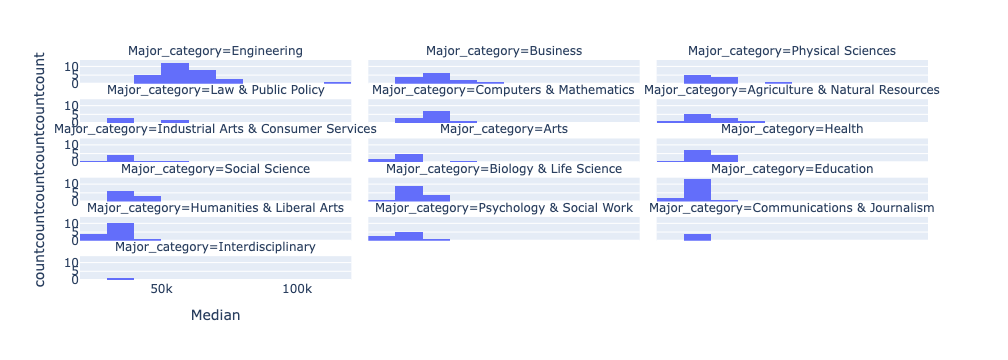

In [60]:
#Make a histogram that explores median income for each of the major categories (facet_col). How did you choose your number of bins?
fig = px.histogram(DF_raw, 
                   x = 'Median',
                   nbins= 15,
                  facet_col='Major_category',
                  facet_col_wrap = 3)
fig.show()

In [65]:
# Why do we often choose the median, rather than the mean, to describe the typical income of a group of people? Look this up online if you don't know the answer!

# This is because it is more accurate compared to taking the mean in order to describe the typical income of a group of people.

In [83]:
# Answer the question: Which major category has the highest typical 
# (you'll need to decide what this means) median income?

my_columns = ['Median', 'Major_category']
DF_mc = DF_raw[my_columns]
DF_mc.groupby('Major_category').mean().sort_values(by = 'Median')

,Median
Major_category,
Psychology & Social Work,30100.000000
Humanities & Liberal Arts,31913.333333
Education,32350.000000
Arts,33062.500000
Communications & Journalism,34500.000000
Interdisciplinary,35000.000000
Industrial Arts & Consumer Services,36342.857143
Biology & Life Science,36421.428571
Health,36825.000000


In [91]:
#Masking to look at just Engineers
mask = DF_raw ['Major_category'] == 'Engineering'
DF_raw[mask]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
11,12,2401,AEROSPACE ENGINEERING,15058.0,12953.0,2105.0,Engineering,0.139793,147,11391,...,2724,8790,794,0.065162,60000,42000,70000,8184,2425,372


### 3. More complicated questions

* Are all STEM fields the same in terms job opportunities?
    * Assume the following are STEM major categories
    
  ``` ["Biology & Life Science", "Computers & Mathematics", "Engineering","Physical Sciences"]```
  
    * Create a DataFrame (using a mask) so you only look at STEM majors.
    * Which STEM majors have median salaries equal to or less than the median for all majors' median earnings?
* What types of majors do women tend to major in?
    * Create a scatterplot of median income vs. proportion of women in that major, coloured by whether the major is in a STEM field or not.

In [112]:
#
my_majors =  ["Biology & Life Science","Computers & Mathematics","Engineering","Physical Sciences"]

mask = (DF_raw ['Major'] == "Biology & Life Science") | (DF_raw ['Major'] == "Engineering") | (DF_raw ['Major'] == "Computers & Mathematics") | (DF_raw ['Major'] == "Physical Sciences")
DF_stem = DF_raw[mask]
DF_stem



,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs


In [22]:
#

In [23]:
#

**(Click Here to Explain your Results)**

### 4. Ask a question of interest to you.

In [24]:
#

**(Click Here to Explain your Results)**